In [3]:
import pandas as pd
import datetime as dt
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

# Data Preparation

In [5]:
df_backup = pd.read_csv("flo_data_20k.csv")

In [6]:
df = df_backup.copy()

In [7]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


In [8]:
df.shape

(19945, 12)

In [9]:
df.describe()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online
count,19945.000000,19945.000000,19945.000000,19945.000000
mean,3.110855,1.913913,253.922597,497.321690
std,4.225647,2.062880,301.532853,832.601886
min,1.000000,1.000000,10.000000,12.990000
25%,1.000000,1.000000,99.990000,149.980000
50%,2.000000,1.000000,179.980000,286.460000
75%,4.000000,2.000000,319.970000,578.440000
max,200.000000,109.000000,18119.140000,45220.130000


In [10]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [12]:
df["total_order"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

df["total_customer_value"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

In [13]:
time_columns = ["first_order_date","last_order_date","last_order_date_online","last_order_date_offline"]
df[time_columns] = df[time_columns].astype('datetime64[ns]')

In [14]:
df.head(2)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_customer_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55


In [79]:
df.groupby("order_channel").agg({"master_id": "count",
                                 "total_order":"sum",
                                 "total_customer_value":"sum"})

,master_id,total_order,total_customer_value
order_channel,,,
Android App,9495,52269.0,7819062.76
Desktop,2735,10920.0,1610321.46
Ios App,2833,15351.0,2525999.93
Mobile,4882,21679.0,3028183.16


In [16]:
df[["master_id","total_customer_value"]].sort_values(by="total_customer_value",ascending=False).head(10) #The top 10 customers with the highest earnings

,master_id,total_customer_value
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,12103.15


In [17]:
df[["master_id","total_order"]].sort_values(by="total_order",ascending=False).head(10) #The top 10 customers with the most orders

,master_id,total_order
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.0
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,131.0
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.0
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.0
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.0
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,82.0
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.0
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,75.0
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,70.0
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,70.0


# RFM Metrics

In [19]:
rfm = pd.DataFrame()

In [20]:
rfm["customer_id"] = df["master_id"]

In [21]:
analysis_date = df["last_order_date"].max() + pd.Timedelta(days=2) # The analysis day was set as 2 days after the latest date.

In [22]:
rfm["recency"] = pd.Series((analysis_date - df["last_order_date"]).dt.days)

In [23]:
rfm["frequency"] = df["total_order"]
rfm["monetary"] = df["total_customer_value"]

## RFM Scores

In [25]:
rfm["recency_score"] = pd.qcut(rfm["recency"], q=5, labels=[5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first") , q=5, labels=[1,2,3,4,5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"], q=5, labels=[1,2,3,4,5])

In [26]:
rfm["RF_score"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str)

In [27]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [28]:
rfm["segment"] = rfm["RF_score"].replace(seg_map, regex=True)

In [29]:
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_score,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37,3,4,4,34,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55,3,5,5,35,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32,2,4,3,24,at_Risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97,3,1,1,31,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98,3,1,1,31,about_to_sleep


# Action

Text(0.5, 1.0, 'Customer Distribution Across Segments')

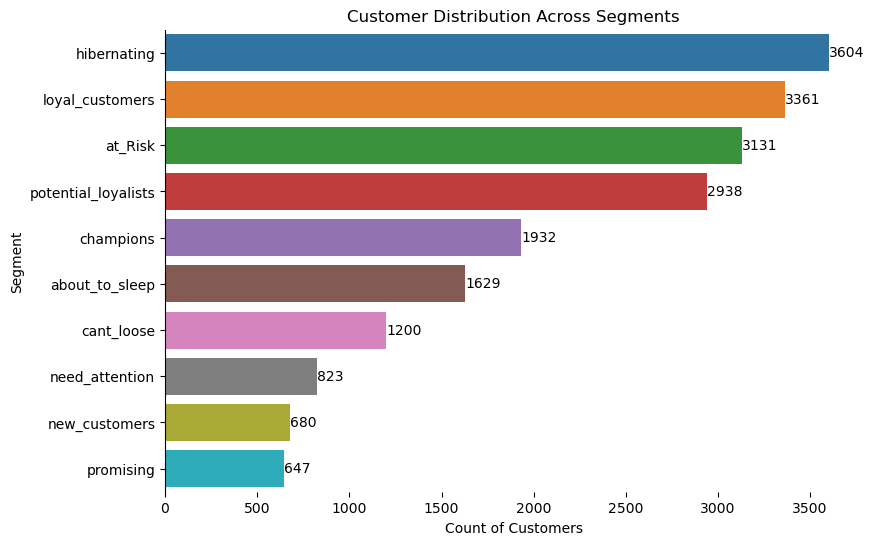

In [236]:
fig = plt.figure(figsize = (9,6))
segments_customer_count = rfm.groupby("segment").agg({"customer_id":"count"}).sort_values(by="customer_id",ascending=False)
ax = sns.barplot(y=segments_customer_count.index,x=segments_customer_count["customer_id"],hue=segments_customer_count.index)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d')
sns.despine(right=True,bottom=True)

plt.xlabel("Count of Customers")
plt.ylabel("Segment")
plt.title("Customer Distribution Across Segments")

In [244]:
rfm_metrics=rfm.groupby("segment").agg({"recency":("mean","count"),
                            "frequency":("mean","count"),
                            "monetary" : ("mean","count")})

rfm_metrics

recency        frequency           monetary      
                           mean count       mean count         mean count
segment                                                                  
about_to_sleep       113.785144  1629   2.401473  1629   359.008963  1629
at_Risk              241.606835  3131   4.472373  3131   646.610236  3131
cant_loose           235.444167  1200  10.698333  1200  1474.468217  1200
champions             17.106625  1932   8.934265  1932  1406.625109  1932
hibernating          247.949501  3604   2.394007  3604   366.267062  3604
loyal_customers       82.594763  3361   8.374591  3361  1216.818616  3361
need_attention       113.828676   823   3.727825   823   562.142965   823
new_customers         17.917647   680   2.000000   680   339.955544   680
potential_loyalists   37.155888  2938   3.304289  2938   533.184466  2938
promising             58.921175   647   2.000000   647   335.672705   647

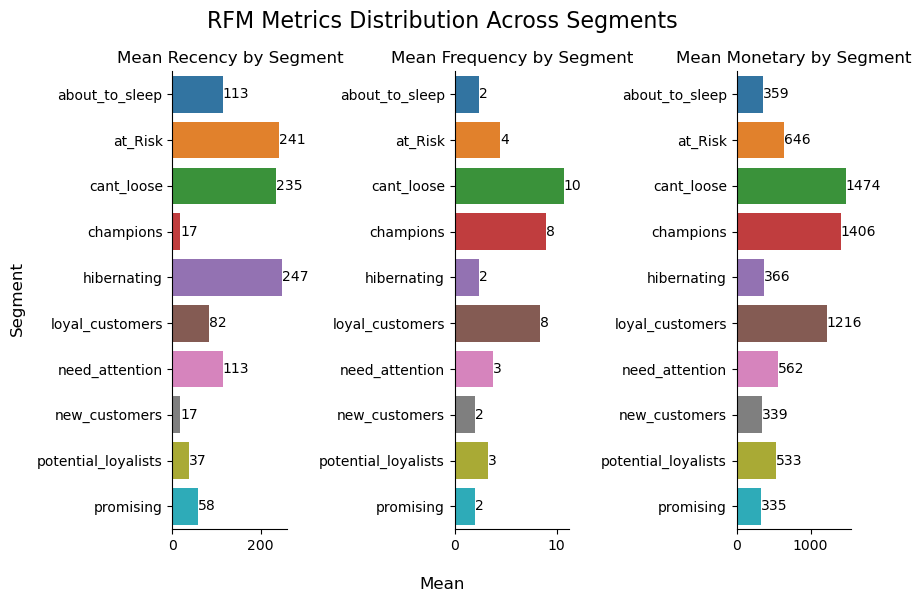

In [242]:
def add_label(axes):
    for container in axes.containers:
        axes.bar_label(container, label_type='edge', fmt='%d')

def remove_xy_label(axes):
    axes.set_xlabel("")
    axes.set_ylabel("")

fig,ax = plt.subplots(1,3,figsize=(9,6))

ax1=sns.barplot(rfm_metrics,y=rfm_metrics.index,x=rfm_metrics["recency"]["mean"],ax=ax[0],hue=rfm_metrics.index)   
ax2=sns.barplot(rfm_metrics,y=rfm_metrics.index,x=rfm_metrics["frequency"]["mean"],ax=ax[1],hue=rfm_metrics.index)
ax3=sns.barplot(rfm_metrics,y=rfm_metrics.index,x=rfm_metrics["monetary"]["mean"],ax=ax[2],hue=rfm_metrics.index)

axes=[ax1,ax2,ax3]

for i in axes:
    add_label(i)
    remove_xy_label(i)

sns.despine(top=True, right=True, left=False, bottom=False)

ax1.set_title("Mean Recency by Segment")
ax2.set_title("Mean Frequency by Segment")
ax3.set_title("Mean Monetary by Segment")

fig.suptitle("RFM Metrics Distribution Across Segments", fontsize=16)


fig.supxlabel("Mean")
fig.supylabel("Segment")
plt.tight_layout()

### a.

In [33]:
women_cat_ids=df[df['interested_in_categories_12'].apply(lambda cat: "KADIN" in cat)]["master_id"]

In [34]:
filtered_rfm_a =rfm[rfm["customer_id"].isin(women_cat_ids)]

In [35]:
loyal_champ_woman_id = filtered_rfm_a[filtered_rfm_a["segment"].isin(["loyal_customers","champions"])]["customer_id"]

In [36]:
loyal_champ_woman_id.to_csv("loyalcustomers_champions_womancat_ids.csv")
loyal_champ_woman_id

0        cc294636-19f0-11eb-8d74-000d3a38a36f
1        f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
8        cfbda69e-5b4f-11ea-aca7-000d3a38a36f
11       c2e15af2-9eed-11e9-9897-000d3a38a36f
33       fb840306-1219-11ea-a001-000d3a38a36f
                         ...                 
19912    f63aba0e-41d8-11ea-96d9-000d3a38a36f
19913    81d0da04-a53e-11e9-a2fc-000d3a38a36f
19914    825e6b00-ab40-11e9-a2fc-000d3a38a36f
19917    f8c471c8-2596-11eb-81e9-000d3a38a36f
19926    7e1c15be-6298-11ea-9861-000d3a38a36f
Name: customer_id, Length: 2497, dtype: object

### b.

In [38]:
men_children_ids = df[df['interested_in_categories_12'].apply(lambda cat: ("ERKEK" in cat) | ("COCUK" in cat))]["master_id"]

In [39]:
filtered_rfm_b = rfm[rfm["customer_id"].isin(men_children_ids)]

In [40]:
target_segment_ids = filtered_rfm_b[filtered_rfm_b["segment"].isin(["cant_loose","at_Risk","hibernating","new_customers"])]["customer_id"]

In [41]:
target_segment_ids.to_csv("target_segment_ids.csv")
target_segment_ids

2        69b69676-1a40-11ea-941b-000d3a38a36f
7        3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f
10       ae608ece-c9d8-11ea-a31e-000d3a38a36f
15       13ed97a4-b167-11e9-89fa-000d3a38a36f
16       d9b77226-a509-11e9-a2fc-000d3a38a36f
                         ...                 
19934    9777eb76-bed4-11ea-958c-000d3a38a36f
19936    1982ac0e-9f4c-11e9-9897-000d3a38a36f
19937    515ca2d8-afdc-11e9-9757-000d3a38a36f
19938    2427ef66-a410-11e9-a2fc-000d3a38a36f
19940    727e2b6e-ddd4-11e9-a848-000d3a38a36f
Name: customer_id, Length: 4655, dtype: object